# Control of Spreading Disease

## Social Distancing
 
 - Make infectious rate ($\beta$) lower - การรักษาระยะห่างทางสังคมจะทำให้อัตราการติดเชื้อต่ำลง
 - Good with high revovery rate ($\gamma$) - ดีถ้าเรามีอัตราการรักษาที่สูง
 - Delay critical situation (peak infection) - ซื้อเวลาไม่ให้เหตุการณ์มันถึงจุดวิกฤติเร็วเกินไป

/var/folders/d1/r7rwb7dx3nzbm5pb0tlf2h_40000gn/T/ipykernel_7210/3061463799.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Z[i+1] = np.array([[S_new, I_new, R_new]]).T


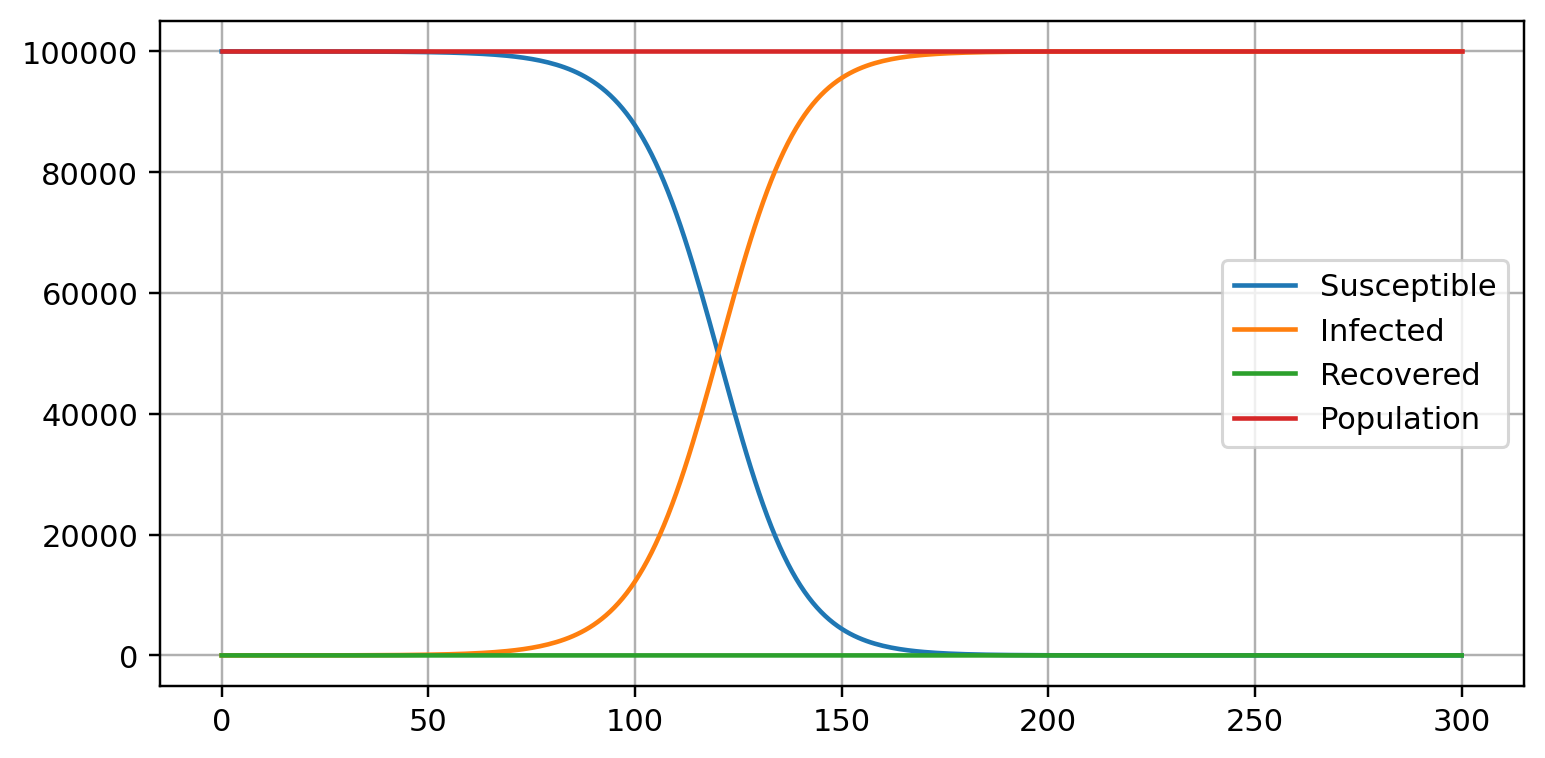

In [17]:
import numpy as np
import matplotlib.pyplot as plt
        

S0 = 99999
I0 = 1
R0 = 0
Population = S0 + I0 + R0

Beta = [2E-5, 1E-5, 2E-6, 1E-6]

# Without Social Distancing: higher beta
# beta = Beta[0]

# With Social Distancing: lower beta
beta = Beta[3]

gamma = 0.00000001

time = 300


def cutpop(x, lb, ub):
    if not (lb <= x <= ub):
        y = 0
    else:
        y = x
    return y


X0 = np.array([[S0, I0, R0]]).T
Z = np.zeros((time+1, 3, 1))
Z[0] = X0

for i in range(time):
    X_now = Z[i]
    S_now = X_now[0]
    I_now = X_now[1]
    R_now = X_now[2]
    
    
    S_new = S_now - beta * S_now * I_now
    S_new = cutpop(S_new, 0.1, Population)
    
    I_new = I_now + beta * S_now * I_now - gamma * I_now
    I_new = cutpop(I_new, 0.1, Population)
    
    R_new = Population - (S_new + I_new)
  
    Z[i+1] = np.array([[S_new, I_new, R_new]]).T
    
S = Z[:, 0, :]
I = Z[:, 1, :]
R = Z[:, 2, :]
N = S + I + R

TIME = np.linspace(0, time, num=time+1, dtype='int')

plt.figure(figsize=(8,4), dpi=220)
plt.plot(TIME, S, label='Susceptible')
plt.plot(TIME, I, label='Infected')
plt.plot(TIME, R, label='Recovered')
plt.plot(TIME, N, label='Population')
plt.legend()
plt.grid()

## Quarantination / Isolation

 - Isolate infectious people ($I$) from the susceptible group ($S$)

## Vaccination
 - Move susceptible people ($S$) to the immuned group ($R$)